In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/ST001937_AN003150.csv')
df = df.drop(['Sample ID', 'RAW_FILE_NAME', 'beta-gentiobiose-1'], axis=1)

sub_df = df
sub_df.describe().T

,count,mean,std,min,25%,50%,75%,max
"1,3,5(10)-estratrien-3,6- beta-17-beta-triol",1160.0,0.599630,9.635550,-186.491942,0.050202,0.153529,0.541650,126.860070
"1,5-anhydroglucitol",1160.0,0.774020,1.617866,-15.302208,0.470990,0.723323,0.992162,40.665768
17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-1,1160.0,1.009531,0.793847,0.028745,0.609089,0.852075,1.201672,11.641053
17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-2,1160.0,0.707177,1.997569,-19.843612,0.031634,0.228074,0.765776,24.195725
17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-3,1160.0,1.011344,1.202871,0.020405,0.134342,0.795301,1.528280,15.805307
...,...,...,...,...,...,...,...,...
urea-4,1160.0,1.091930,3.380549,0.014105,0.091561,0.156378,0.340881,48.041776
uridine,1160.0,1.875119,16.396033,-22.231170,0.016818,0.112790,0.464196,428.787832
valine,1160.0,1.039777,3.577378,-23.009451,0.174338,0.359630,0.841951,63.207003
xanthine,1160.0,1.110534,3.435902,0.009951,0.291578,0.571841,1.059627,84.958222


1

Text(0.5, 0.98, 'Metabolite distribution by Phenotypes')

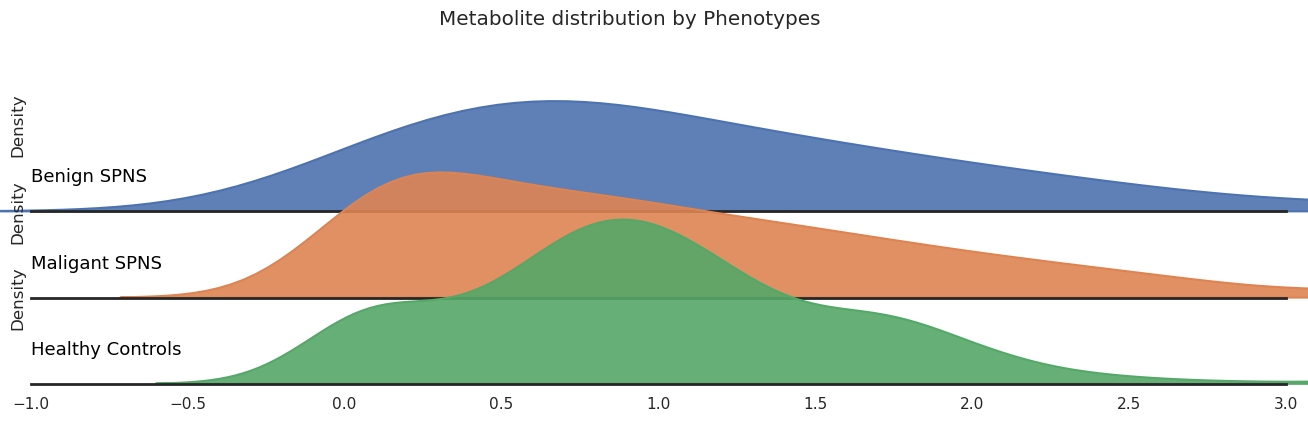

In [2]:

# Theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth': 2})
g = sns.FacetGrid(sub_df, row="Phenotypes", hue="Phenotypes", aspect=9, height=1.5)

# map df to plot, color group by phenotypes
g.map_dataframe(sns.kdeplot, fill=True, linewidth=1.5, alpha=.9,  clip_on=False, x="glucose-6-phosphate-1")


# function to draw labels
def label(x, color, label):
    ax = plt.gca()  #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)


# iterate grid to plot labels
g.map(label, "Phenotypes")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

#viewport beetwen 0 and 1
g.set(xlim=(-1, 3))


# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('Metabolite distribution by Phenotypes', y=0.98)